## Lead Scoring Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import warnings as warnings
warnings.filterwarnings("ignore")

In [3]:
lead_df = pd.read_excel("Data_Science_Internship.xlsx",index_col=0)
lead_df.head(5)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
lead_df.shape

(46608, 15)

In [5]:
lead_df.describe().T

,count,unique,top,freq,first,last
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186,NaT,NaT
status,46608,6,LOST,43244,NaT,NaT
lost_reason,43244,30,Low availability,8892,NaT,NaT
budget,42908,1840,£60 - £120 Per week,9862,NaT,NaT
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111,NaT,NaT
movein,32970,477,2022-09-10 00:00:00,2453,1970-01-01,2024-09-04
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306,NaT,NaT
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851,NaT,NaT
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812,NaT,NaT
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125,NaT,NaT


In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 46608 entries, 0.0 to 46607.0
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        46608 non-null  object        
 1   status          46608 non-null  object        
 2   lost_reason     43244 non-null  object        
 3   budget          42908 non-null  object        
 4   lease           44267 non-null  object        
 5   movein          32970 non-null  datetime64[ns]
 6   source          46608 non-null  object        
 7   source_city     46608 non-null  object        
 8   source_country  46608 non-null  object        
 9   utm_source      46608 non-null  object        
 10  utm_medium      46608 non-null  object        
 11  des_city        46608 non-null  object        
 12  des_country     46608 non-null  object        
 13  room_type       23061 non-null  object        
 14  lead_id         46608 non-null  object        
d

In [7]:
leads_modified_df = lead_df.drop_duplicates(keep = 'first')
leads_modified_df.shape

(46598, 15)

In [8]:
leads_modified_df = leads_modified_df[(leads_modified_df['status'] == 'WON') | (leads_modified_df['status'] == 'LOST')]
leads_modified_df['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

In [9]:
# Change the mapping of a column
leads_modified_df['status'] = leads_modified_df['status'].map({'WON':1, 'LOST':0})
leads_modified_df['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [10]:
# Replacing the '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' with NaN
leads_modified_df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NAN, inplace=True)
leads_modified_df.head(5)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [11]:
# Function to remove the columns having more than 40% missing values
def rmissingvaluecol(dff, threshold):
    col = []
    col = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((dff.columns.values))) - set(col)))
    return col

In [12]:
# Removing columns having 40% missing values
col = rmissingvaluecol(leads_modified_df, 40)
leads_modified_df = leads_modified_df[col]
leads_modified_df.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [13]:
# Deleting rows containing either 70% or more than 70% NaN Values
perc = 70.0 
min_count =  int(((100-perc)/100)*leads_modified_df.shape[1] + 1)

In [14]:
leads_modified_df = leads_modified_df.dropna(axis=0, thresh=min_count)
leads_modified_df.shape

(46307, 14)

In [15]:
# Checking the unique categories
column_names = leads_modified_df.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(leads_modified_df[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name        : st

Name: lead_id, Length: 30491, dtype: float64




In [16]:
# Removing columns with highly skewed data
skewed_columns_to_be_dropped = ['des_country','lead_id']

In [17]:
leads_modified_df.drop(skewed_columns_to_be_dropped, axis=1, inplace=True)
leads_modified_df.shape

(46307, 12)

In [18]:
round(leads_modified_df.isnull().sum() * 100 / len(leads_modified_df), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.96
lease              5.04
movein            29.38
source            12.84
source_city       19.05
source_country    18.60
utm_source         0.13
utm_medium         6.87
des_city           5.46
dtype: float64

In [19]:
leads_modified_df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city'],
      dtype='object')

In [20]:
# Listing down categorical columns with missing values
categorical_column_names = ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 'des_city','utm_source','utm_medium']
for column_name in categorical_column_names:
    print("Column Name        :", column_name)
    print("------------------------------")
    #print("Unique Values      : ", leads_modified_df[column_name].unique())
    
    values_to_be_imputed = leads_modified_df[column_name].isnull().sum()
    print("Any Null (Before)  :", values_to_be_imputed)
    
    leads_modified_df[column_name].fillna(leads_modified_df[column_name].mode()[0], inplace=True)
    print(values_to_be_imputed, " values imputed with mode values of the column.")
    
    print("Null Values (After):", leads_modified_df[column_name].isnull().sum())
    print('\n')

Column Name        : lost_reason
------------------------------
Any Null (Before)  : 3072
3072  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : budget
------------------------------
Any Null (Before)  : 3687
3687  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : lease
------------------------------
Any Null (Before)  : 2334
2334  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : movein
------------------------------
Any Null (Before)  : 13605
13605  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source
------------------------------
Any Null (Before)  : 5946
5946  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source_city
------------------------------
Any Null (Before)  : 8821
8821  values imputed with mode values of the column.
Null Values (After): 0


Column Name

In [21]:
# Checking the unique categories
column_names = leads_modified_df.columns

for column_name in column_names:
    print("Column Name        :", column_name)
    print("-----------------------------------------------------")
    print(leads_modified_df[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
-----------------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name 

In [22]:
# Changing categories with lesser percentage to 'others'

def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

In [23]:
# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = leads_modified_df.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

In [24]:
for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = leads_modified_df[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')

    leads_modified_df[column_name] = leads_modified_df[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    value_counts_df = leads_modified_df[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


After :
others       

After :
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    58.909020
others                                                              26.071652
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    15.019328
Name: source_country, dtype: float64


Column Name :  utm_source
-----------------------------------------
Before :
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3    66.801995
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    10.253309
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     4.258535
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3     3.759691
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579     3.295398
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7     2.699376
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1     2.260997
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158     1.865809
44574c4ba2ea74ad4b

In [25]:
leads_modified_df = leads_modified_df.dropna()

In [26]:
# Verifying various parameters after cleaning
print("Before Cleaning Data")
print("*********************************")
print("Shape: ", lead_df.shape)
print("Missing:")
print("-----------------------")
print(round(lead_df.isnull().sum()*100/len(lead_df), 2))

print('\n')
print("After Cleaning Data")
print("*********************************")
print("Shape: ", leads_modified_df.shape)
print("Missing:")
print("-----------------------")
print(round(leads_modified_df.isnull().sum()*100/len(leads_modified_df), 2))

Before Cleaning Data
*********************************
Shape:  (46608, 15)
Missing:
-----------------------
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source             0.00
source_city        0.00
source_country     0.00
utm_source         0.00
utm_medium         0.00
des_city           0.00
des_country        0.00
room_type         50.52
lead_id            0.00
dtype: float64


After Cleaning Data
*********************************
Shape:  (46307, 12)
Missing:
-----------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
dtype: float64


In [27]:
column_names = ['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']

In [28]:
for column_name in column_names:
    dummies = pd.get_dummies(leads_modified_df[column_name])
    dummies.drop('others', axis=1, inplace=True)
    leads_modified_df = pd.concat([leads_modified_df, dummies], axis=1)
    leads_modified_df.drop(column_name, axis=1, inplace=True)
    print("Dummies created for: ", column_name)

Dummies created for:  Agent_id
Dummies created for:  lost_reason
Dummies created for:  budget
Dummies created for:  lease
Dummies created for:  movein
Dummies created for:  source
Dummies created for:  source_city
Dummies created for:  source_country
Dummies created for:  utm_source
Dummies created for:  utm_medium
Dummies created for:  des_city


In [29]:
leads_modified_df.head()

,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0.0,...,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0.0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1.0,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2.0,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3.0,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4.0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1


In [30]:
#Splitting the data into train-test set
# Putting feature variable to X
X = leads_modified_df.drop('status', axis=1)
X.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0.0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0.0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1.0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2.0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4.0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1


In [31]:
# Putting response variable to y
y = leads_modified_df.status
y.head()

0.0    0
1.0    0
2.0    0
3.0    0
4.0    0
Name: status, dtype: int64

In [32]:
# Splitting the data into train and test on a ratio of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

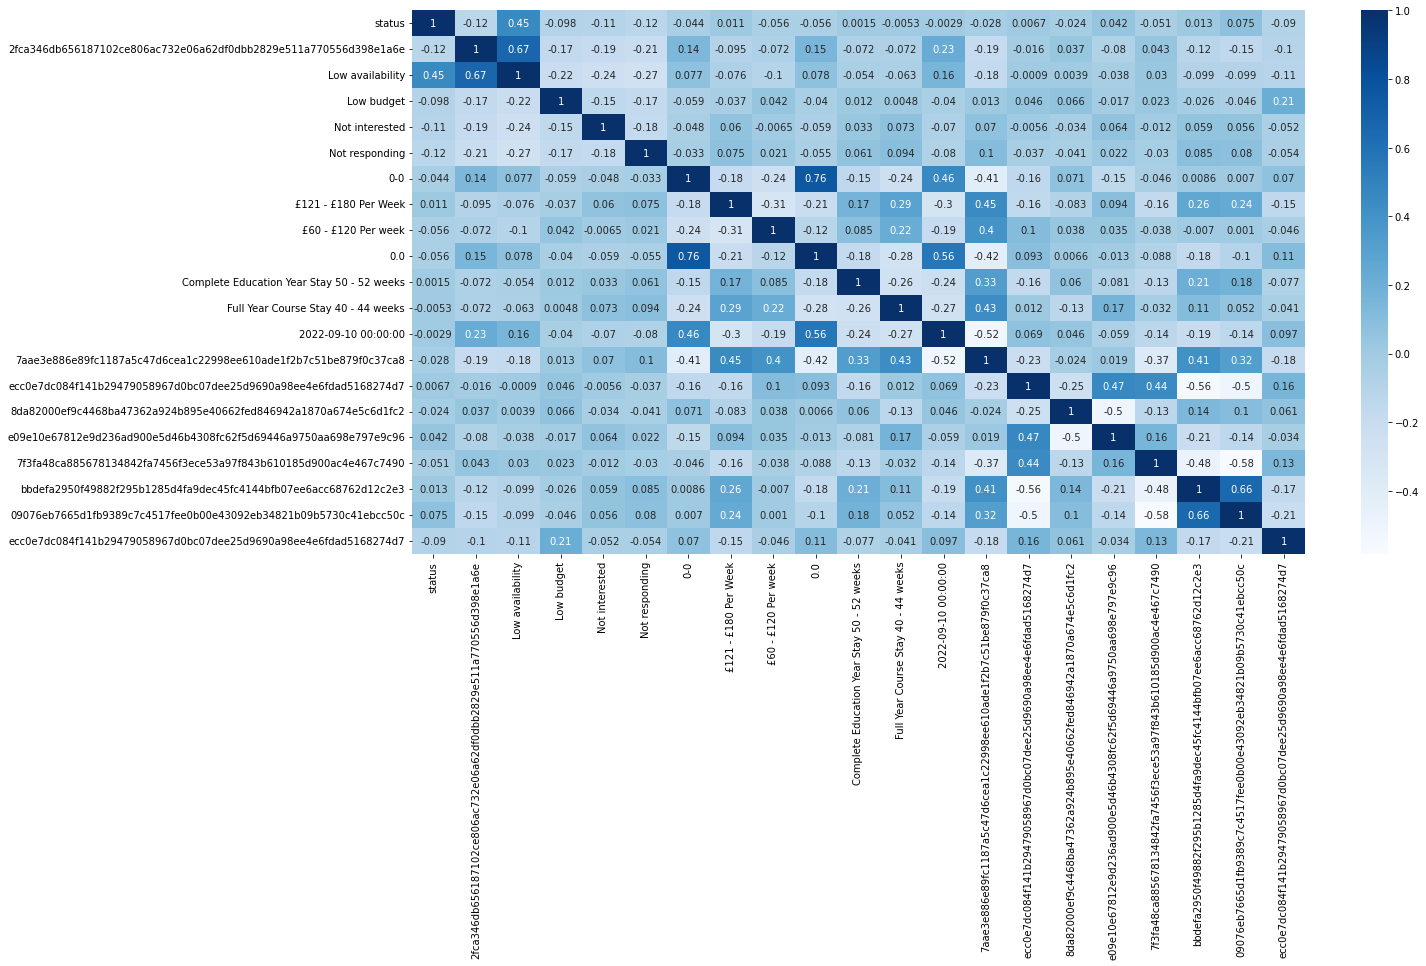

In [33]:
#Scaling the continuous data
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_modified_df.corr(), annot = True, cmap="Blues")
plt.show()

In [34]:
#Building our first model
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32414
Model:                            GLM   Df Residuals:                    32393
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.3
Date:                Tue, 28 Feb 2023   Deviance:                       2922.6
Time:                        15:14:58   Pearson chi2:                 3.34e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3290
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.8819   2.37e+04     -0.001      0.999   -4.64e+04    4.64e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6546   3.08e+04     -0.001      0.999   -6.04e+04    6.04e+04
Low availability                                                    31.6255   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Low budget                                                           0.2735    4.5e+04   6.08e-06      1.000   -8.82e+04    8.82e+04
Not interested                                                      -0.3886   4.44e+04  -8.76e-06      1.000   -8.69e+04    8.69e+04
Not responding                                                      -0.3236   4.13e+04  -7.84e-06      1.000   -8.09e+04    8.09e+04
0-0                                                                 -0.6577      0.256     -2.569      0.010      -1.160      -0.156
£121 - £180 Per Week                                                 0.2762      0.173      1.595      0.111      -0.063       0.616
£60 - £120 Per week                                                 -0.1498      0.148     -1.009      0.313      -0.441       0.141
0.0                                                                 -0.8364      0.243     -3.448      0.001      -1.312      -0.361
Complete Education Year Stay 50 - 52 weeks                           0.0578      0.170      0.340      0.734      -0.275       0.390
Full Year Course Stay 40 - 44 weeks                                  0.1089      0.147      0.740      0.459      -0.179       0.397
2022-09-10 00:00:00                                                  0.2202      0.135      1.634      0.102      -0.044       0.484
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.7282      0.177     -4.123      0.000      -1.074      -0.382
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.1659      0.153      1.087      0.277      -0.133       0.465
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.0686      0.151     -0.454      0.650      -0.365       0.228
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.5860      0.124      4.722      0.000       0.343       0.829
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    -0.5708      0.225     -2.538      0.011      -1.012      -0.130
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     0.1817      0.130      1.399      0.162      -0.073       0.436
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     0.8784      0.142      6.178      0.000       0.600       1.157
ecc0e7dc084f141b29479058

In [35]:
#Running RFE to check parameter significance
# Initializing LogisticRegression
logreg = LogisticRegression()

In [36]:
# Running RFE with 17 variables as output
rfe = RFE(logreg, step=17)             
rfe = rfe.fit(X_train, y_train)

In [37]:
# Listing the columns
for i in list(zip(X_train.columns, rfe.support_, rfe.ranking_)):
    print(i)

('2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e', True, 1)
('Low availability', True, 1)
('Low budget', True, 1)
('Not interested', True, 1)
('Not responding', True, 1)
('0-0', True, 1)
('£121 - £180 Per Week', False, 2)
('£60 - £120 Per week', False, 2)
(0.0, True, 1)
('Complete Education Year Stay 50 - 52 weeks', False, 2)
('Full Year Course Stay 40 - 44 weeks', False, 2)
(Timestamp('2022-09-10 00:00:00'), False, 2)
('7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8', True, 1)
('ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7', False, 2)
('8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2', False, 2)
('e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96', False, 2)
('7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490', False, 2)
('bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3', False, 2)
('09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c', True, 1)
('ecc0e7

In [38]:
# Listing down the columns important for building a model
col = X_train.columns[rfe.support_]
col

Index(['2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e',
                                                       'Low availability',
                                                             'Low budget',
                                                         'Not interested',
                                                         'Not responding',
                                                                    '0-0',
                                                                      0.0,
       '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'],
      dtype='object')

In [39]:
# Listing down the columns not important
z = X_train.columns[~rfe.support_]
z

Index([                                            '£121 - £180 Per Week',
                                                    '£60 - £120 Per week',
                             'Complete Education Year Stay 50 - 52 weeks',
                                    'Full Year Course Stay 40 - 44 weeks',
                                                      2022-09-10 00:00:00,
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7',
       '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
       'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
       '7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490',
       'bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3'],
      dtype='object')

In [40]:
#Building our model
# Building our second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32414
Model:                            GLM   Df Residuals:                    32402
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1490.7
Date:                Tue, 28 Feb 2023   Deviance:                       2981.5
Time:                        15:15:00   Pearson chi2:                 3.34e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3278
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.6560   2.38e+04     -0.001      0.999   -4.67e+04    4.67e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6081    3.1e+04     -0.001      0.999   -6.09e+04    6.08e+04
Low availability                                                    31.6020   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
Low budget                                                           0.2457   4.52e+04   5.43e-06      1.000   -8.86e+04    8.87e+04
Not interested                                                      -0.2972   4.47e+04  -6.65e-06      1.000   -8.75e+04    8.75e+04
Not responding                                                      -0.2606   4.16e+04  -6.27e-06      1.000   -8.15e+04    8.15e+04
0-0                                                                 -0.8000      0.245     -3.268      0.001      -1.280      -0.320
0.0                                                                 -0.5625      0.215     -2.614      0.009      -0.984      -0.141
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.5955      0.113     -5.288      0.000      -0.816      -0.375
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.1503      0.123      9.359      0.000       0.909       1.391
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.3180      0.124      2.572      0.010       0.076       0.560
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -2.8585      0.110    -25.992      0.000      -3.074      -2.643
====================================================================================================================================
"""

In [41]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.76703997e-14, 1.16240290e-13, 2.06901847e-15, 6.20165471e-15,
       8.95746711e-14, 8.40593239e-14, 1.48612463e-13, 8.45748744e-14,
       6.51733281e-14, 1.08128433e-13])

In [42]:
# Forming prediction table 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,2.767040e-14,38889.0
1,0,1.162403e-13,37925.0
2,0,2.069018e-15,11421.0
3,0,6.201655e-15,30608.0
4,0,8.957467e-14,31394.0


In [43]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,2.767040e-14,38889.0,0
1,0,1.162403e-13,37925.0,0
2,0,2.069018e-15,11421.0,0
3,0,6.201655e-15,30608.0,0
4,0,8.957467e-14,31394.0,0


In [44]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score
0,0,2.767040e-14,38889.0,0,0
1,0,1.162403e-13,37925.0,0,0
2,0,2.069018e-15,11421.0,0,0
3,0,6.201655e-15,30608.0,0,0
4,0,8.957467e-14,31394.0,0,0


In [45]:
y_train_pred_final['Lead_Score'].value_counts()

0     29135
82     1038
89      469
92      262
20      183
17      172
86      159
68      156
78      124
32      109
72       77
13       76
10       64
11       57
39       41
4        40
40       35
59       31
66       31
67       30
27       30
26       17
8        15
54       12
74       11
79       11
14       10
6         9
5         4
53        4
61        1
21        1
Name: Lead_Score, dtype: int64

In [46]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29832   425]
 [  166  1991]]


In [47]:
print(metrics.classification_report(y_train_pred_final.Converted,y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30257
           1       0.82      0.92      0.87      2157

    accuracy                           0.98     32414
   macro avg       0.91      0.95      0.93     32414
weighted avg       0.98      0.98      0.98     32414



In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,0-0,0.13
6,0.0,0.10
1,Low availability,0.06
0,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.05
3,Not interested,0.04
4,Not responding,0.04
2,Low budget,0.02
7,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,0.02
9,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.02
8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,0.00


In [49]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

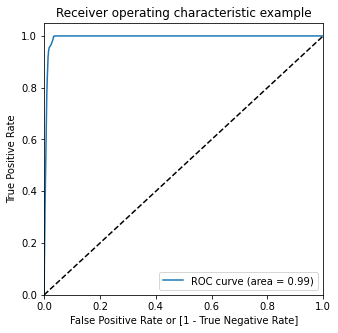

In [50]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [51]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.767040e-14,38889.0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1.162403e-13,37925.0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,2.069018e-15,11421.0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,6.201655e-15,30608.0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,8.957467e-14,31394.0,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
cutoff_df = pd.DataFrame(columns= ['prob','accuracy','sensi','speci'])

In [53]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.066545  1.000000  0.000000
0.1   0.1  0.967236  0.998146  0.965033
0.2   0.2  0.974733  0.966620  0.975311
0.3   0.3  0.980317  0.955030  0.982120
0.4   0.4  0.981767  0.923041  0.985954
0.5   0.5  0.981767  0.923041  0.985954
0.6   0.6  0.981304  0.908669  0.986482
0.7   0.7  0.979021  0.840983  0.988862
0.8   0.8  0.976029  0.766806  0.990944
0.9   0.9  0.940489  0.113584  0.999438


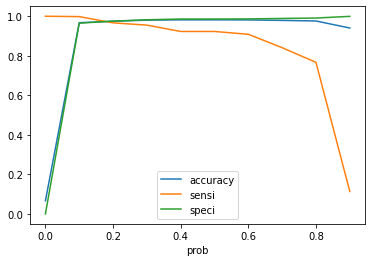

In [54]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [55]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,2.767040e-14,38889.0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.162403e-13,37925.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.069018e-15,11421.0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,6.201655e-15,30608.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,8.957467e-14,31394.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [56]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[29832   425]
 [  166  1991]]


In [57]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [58]:
accuracy = ((TP+TN)/(TP+TN+FP+FN))
print(accuracy)

0.9817671376565682


In [59]:
recall = (TP/(TP+FN))
print(recall)

0.923041261010663


In [60]:
specificity = (TN/(TN+FP))
print(specificity)

0.9859536636150312


In [61]:
precision = (TP/(TP+FP))
print(precision)

0.8240894039735099


In [62]:
print(metrics.classification_report(y_train_pred_final.Converted,y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30257
           1       0.82      0.92      0.87      2157

    accuracy                           0.98     32414
   macro avg       0.91      0.95      0.93     32414
weighted avg       0.98      0.98      0.98     32414



In [63]:
metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.923041261010663

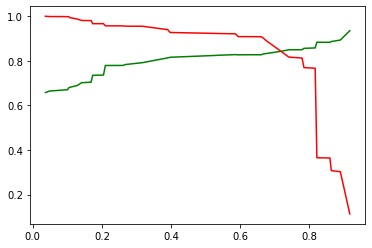

In [64]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [65]:
X_test = X_test[col]
X_test.head(5)

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,0.0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
42116.0,1,1,0,0,0,0,0,1,0,1,1
18517.0,0,0,0,0,1,1,1,0,1,0,0
17619.0,0,0,0,0,1,0,0,0,0,0,0
44334.0,0,0,1,0,0,0,1,1,0,1,0
16597.0,0,0,0,0,0,0,0,1,1,0,0


In [66]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

KeyError: 10

In [67]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head(5)

,0
42116.0,2.097395e-15
18517.0,3.026964e-14
17619.0,3.742123e-14
44334.0,2.680356e-14
16597.0,8.457487e-14


In [68]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [69]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [70]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [71]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [72]:
y_pred_final.head()

,status,LeadId,0
0,0,42116.0,2.097395e-15
1,0,18517.0,3.026964e-14
2,0,17619.0,3.742123e-14
3,0,44334.0,2.680356e-14
4,0,16597.0,8.457487e-14


In [73]:
y_pred_final['status'].value_counts()

0    12978
1      915
Name: status, dtype: int64

In [74]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','status','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,status,Converted_Prob
0,42116.0,0,2.097395e-15
1,18517.0,0,3.026964e-14
2,17619.0,0,3.742123e-14
3,44334.0,0,2.680356e-14
4,16597.0,0,8.457487e-14


In [75]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,LeadId,status,Converted_Prob,final_predicted,Lead_Score
0,42116.0,0,2.097395e-15,0,0
1,18517.0,0,3.026964e-14,0,0
2,17619.0,0,3.742123e-14,0,0
3,44334.0,0,2.680356e-14,0,0
4,16597.0,0,8.457487e-14,0,0


In [76]:
metrics.confusion_matrix(y_pred_final.status,y_pred_final.final_predicted)

array([[12750,   228],
       [   41,   874]], dtype=int64)

In [77]:
# Let's check the overall report.
print(metrics.classification_report(y_pred_final.status, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12978
           1       0.79      0.96      0.87       915

    accuracy                           0.98     13893
   macro avg       0.89      0.97      0.93     13893
weighted avg       0.98      0.98      0.98     13893

